In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Spotify control

In [2]:
import os

In [3]:
CLIENT_ID = os.environ["SPOTIFY_CLIENT_ID"]
CLIENT_SECRET = os.environ["SPOTIFY_CLIENT_SECRET"]
REDIRECT_URI = "http://localhost:5000/callback/q"
scope = 'user-modify-playback-state'
username = "11140368243"

In [7]:
import spotipy
import spotipy.util as util
from json.decoder import JSONDecodeError

In [9]:
token = util.prompt_for_user_token(username,
                           scope,
                           client_id=CLIENT_ID,
                           client_secret=CLIENT_SECRET,
                           redirect_uri=REDIRECT_URI)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=ca95409a9ae5414cb17d273f08456be6&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A5000%2Fcallback%2Fq&scope=user-modify-playback-state in your browser


Enter the URL you were redirected to: http://localhost:5000/callback/q?code=AQCtja98A4lbt2dDNIZQnmOovYXlIf6yfvLiNGm9axqC9x5pkTDR-ln-_2NyuP6-VhEqvv6AjEpuWD3_iG0g5J1Ve7-El0H-YupBs5iYm9TAerijDYSlJ-98j2uttjkc1j9d7ycfCx1eqYJ8ezIEswX2VHnZRhQHVeLiBckMey5K8yRv0Q1Z6_eZL81HD4nflpeLSEwvsItxDhSDrDrW3JQ7AHNhrFHQYReVbfDfznK7_Q




In [11]:
sp = spotipy.Spotify(auth=token)

In [14]:
sp.next_track()

# Store images

In [15]:
import datetime

In [18]:
import time

In [21]:
f"{int(time.time())}.png"

'1585407949.png'

In [25]:
import sys
sys.path.append("C:/git/mouse-control/")

from mousecontrol.listener import MouseMoveListener

In [26]:
listener = MouseMoveListener()

In [35]:
c = listener.listen(2000,max_stop = 1,save = "shapes/random")

Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... Stop recording
Start recording
... 

KeyboardInterrupt: 

# Deep Learning

- https://docs.fast.ai/tutorial.data.html
- https://docs.fast.ai/vision.html

In [3]:
from fastai.vision import *

In [4]:
tfms = get_transforms(
    do_flip=False,
#     max_lighting=None,
#     max_warp = None,
#     max_zoom = 1,
#     max_rotate = None,
)

In [5]:
from pathlib import Path

folder = Path("c:/git/mouse-control/notebooks/shapes")

dataset = {
    0:["random","circle"],
    1:["play"]
}
df = []
for k,v in dataset.items():
    for cat_folder in v:
        files = list((folder/cat_folder).glob("*.png"))
        files = [{"name":str(x.relative_to(folder)),"label":k} for x in files]
        df.extend(files)
df = pd.DataFrame(df)
df.head()

,name,label
0,random\1585408333.png,0
1,random\1585408336.png,0
2,random\1585408349.png,0
3,random\1585408403.png,0
4,random\1585408407.png,0


In [7]:
data = (ImageList.from_df(df,folder)
        .split_by_rand_pct(0.2)
        .label_from_df()
        .transform(tfms, size=100)
        .databunch()
        .normalize(imagenet_stats)
       )

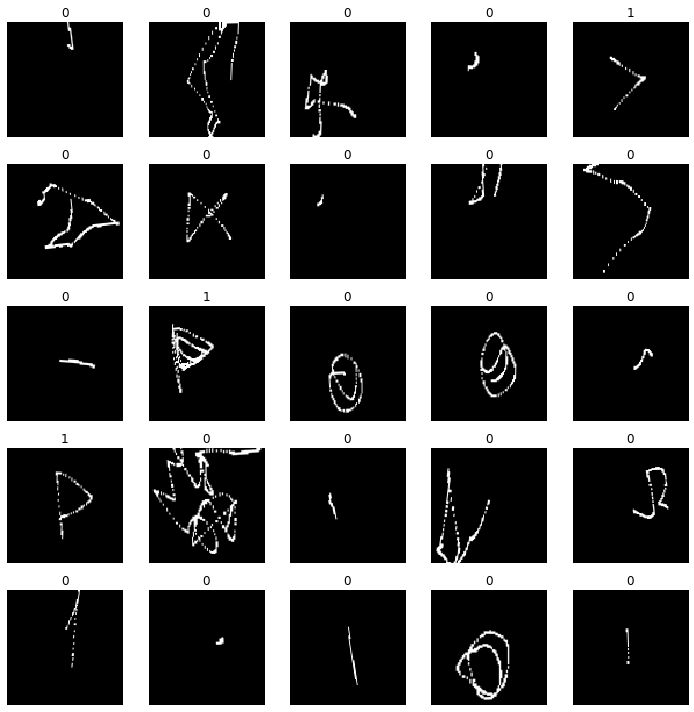

In [8]:
data.show_batch(rows=5, figsize=(10,10))

In [9]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(10,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,accuracy,time
0,1.267987,10.377047,0.107143,01:42
1,1.352933,0.729218,0.857143,01:43
2,1.238084,2.534070,0.392857,01:40
3,0.971856,8.987492,0.178571,01:26
4,0.882767,16.084938,0.107143,01:40
5,0.791270,17.688192,0.107143,01:44
6,0.732638,13.896832,0.142857,01:41
7,0.729957,4.926063,0.428571,01:37
8,0.695289,1.736715,0.535714,01:58
9,0.668559,2.123896,0.500000,01:55


interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(6,6))

In [ ]:
interp.plot_confusion_matrix()

# Training with Keras

[autoreload of scipy.stats.stats failed: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\ProgramData\Anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py", line 189, in <module>
    from ._stats import (_kendall_dis, _toint64, _weightedrankedtau,
ImportError: cannot import name '_local_

]
[autoreload of scipy.integrate._ivp failed: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\ProgramData\Anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ivp\__init__.py", line 5, in <module>
    from .rk import RK23, RK45, DOP853
ImportError: cannot import name 'DOP853' from 'scipy.in

{0: ['random', 'circle'], 1: ['play']}